In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#Download data from yfinance for each crypto of interest
btcusd = yf.download("BTC-USD", start = "2021-01-01", end = "2022-03-09", interval= '60m')
btcusd.drop(columns=['Adj Close', 'Volume'], inplace =True)

ethusd = yf.download("ETH-USD", start = "2021-01-01" , end ="2022-03-09" , interval= '60m' )
ethusd.drop(columns=['Adj Close', 'Volume'], inplace =True)

xmrusd = yf.download("XMR-USD", start = "2021-01-01" , end ="2022-03-09" , interval= '60m' )
xmrusd.drop(columns=['Adj Close', 'Volume'], inplace =True)

dcrusd = yf.download("DCR-USD", start = "2021-01-01" , end ="2022-03-09" , interval= '60m' )
dcrusd.drop(columns=['Adj Close', 'Volume'], inplace =True)

ltcusd = yf.download("LTC-USD", start = "2021-01-01" , end ="2022-03-09" , interval= '60m' )
ltcusd.drop(columns=['Adj Close', 'Volume'], inplace =True)

xmrusd



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2021-01-01 05:00:00+00:00,160.092911,160.222183,159.203110,159.243210
2021-01-01 06:00:00+00:00,159.248383,160.825729,159.055573,159.265472
2021-01-01 07:00:00+00:00,159.265961,159.475266,157.787460,158.870544
2021-01-01 08:00:00+00:00,158.860168,158.940414,157.284424,158.824600
2021-01-01 09:00:00+00:00,158.822205,161.878799,158.680588,161.649002
...,...,...,...,...
2022-03-09 00:00:00+00:00,204.630539,204.630539,199.127518,201.985321
2022-03-09 01:00:00+00:00,201.905350,204.150803,200.158890,200.234390
2022-03-09 02:00:00+00:00,200.573639,202.155365,199.835114,201.343262


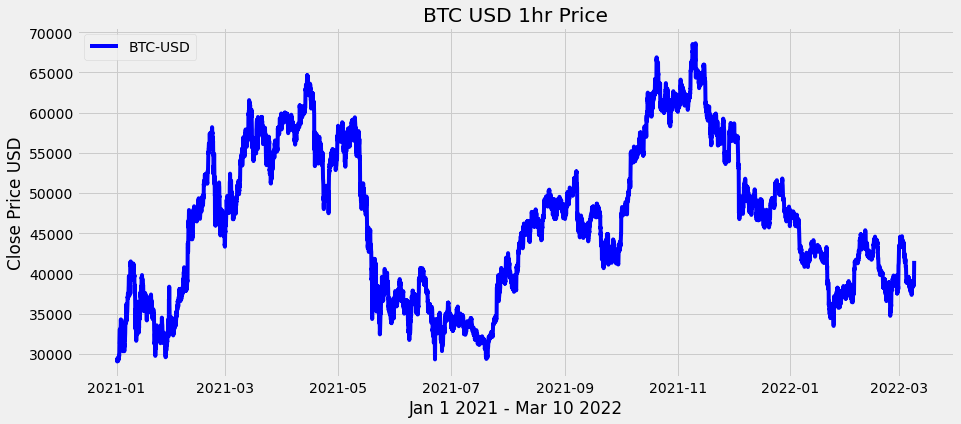

In [3]:
#Visualize the gathered data for BTC USD 

plt.figure(figsize=(14,6))
plt.plot(btcusd['Close'], label = 'BTC-USD', color = 'blue')
plt.title('BTC USD 1hr Price')
plt.xlabel('Jan 1 2021 - Mar 10 2022')
plt.ylabel('Close Price USD')
plt.legend( loc = "upper left")
plt.show()

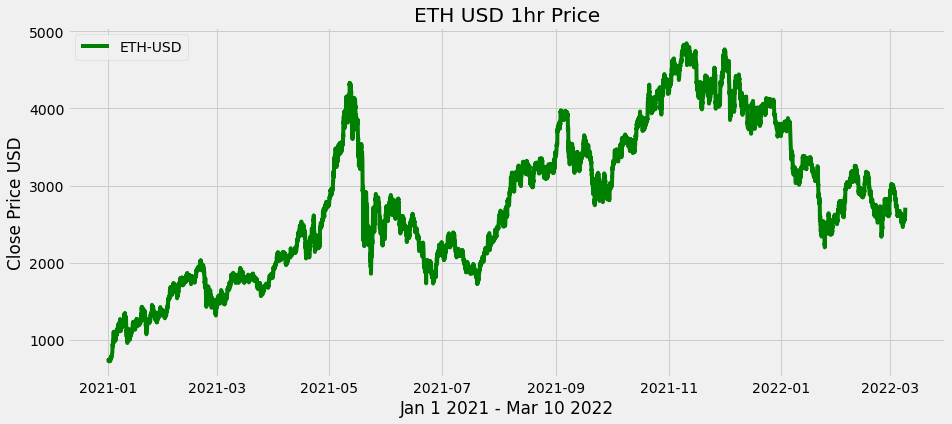

In [4]:
#Visualize the gathered data for ETH USD 

plt.figure(figsize=(14,6))
plt.plot(ethusd['Close'], label = 'ETH-USD', color = 'green')
plt.title('ETH USD 1hr Price')
plt.xlabel('Jan 1 2021 - Mar 10 2022')
plt.ylabel('Close Price USD')
plt.legend( loc = "upper left")
plt.show()

Text(0, 0.5, 'Close Price USD')

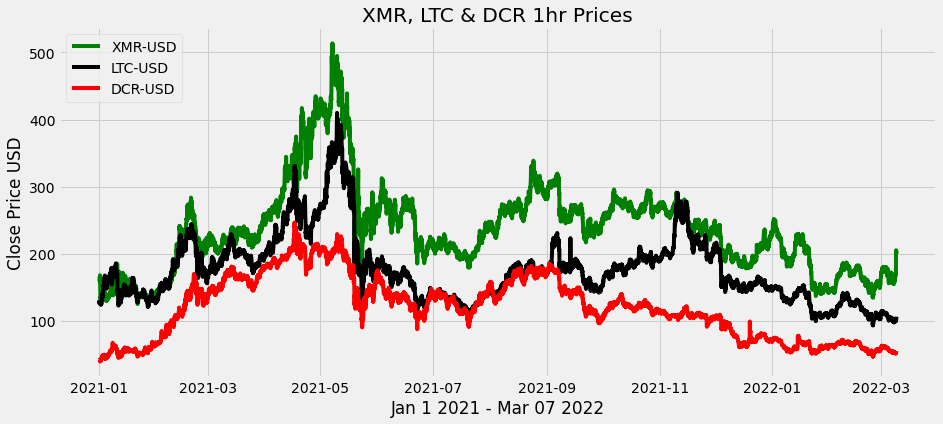

In [5]:
#Visualizing all the other crypto pairs.

plt.figure(figsize=(14, 6))
plt.plot(xmrusd['Close'], label = "XMR-USD", color = 'green')
plt.plot(ltcusd['Close'], label = "LTC-USD", color = 'black')
plt.plot(dcrusd['Close'], label = "DCR-USD", color = 'red')
plt.title('XMR, LTC & DCR 1hr Prices')
plt.legend(loc = "upper left")
plt.xlabel('Jan 1 2021 - Mar 07 2022')
plt.ylabel('Close Price USD')

Simple Moving Average - 30 hours window

In [6]:
SMA30 = pd.DataFrame()
SMA30['Close'] = btcusd['Close'].rolling(window = 30).mean()
#Preview of our SMA30 data
SMA30

,Close
Datetime,
2021-01-01 05:00:00+00:00,NaN
2021-01-01 06:00:00+00:00,NaN
2021-01-01 07:00:00+00:00,NaN
2021-01-01 08:00:00+00:00,NaN
2021-01-01 09:00:00+00:00,NaN
...,...
2022-03-09 00:00:00+00:00,38525.397135
2022-03-09 01:00:00+00:00,38585.929036
2022-03-09 02:00:00+00:00,38646.611979


Simple Moving Average - 100 hours window

In [9]:
SMA100 = pd.DataFrame()
SMA100['Close'] = btcusd['Close'].rolling(window = 100).mean()
#Previewing our SMA100 data
SMA100

,Close
Datetime,
2021-01-01 05:00:00+00:00,NaN
2021-01-01 06:00:00+00:00,NaN
2021-01-01 07:00:00+00:00,NaN
2021-01-01 08:00:00+00:00,NaN
2021-01-01 09:00:00+00:00,NaN
...,...
2022-03-09 00:00:00+00:00,38796.010938
2022-03-09 01:00:00+00:00,38793.223906
2022-03-09 02:00:00+00:00,38797.566836


Visualizing both 30 & 100 Moving Averages with BTC Price Line.

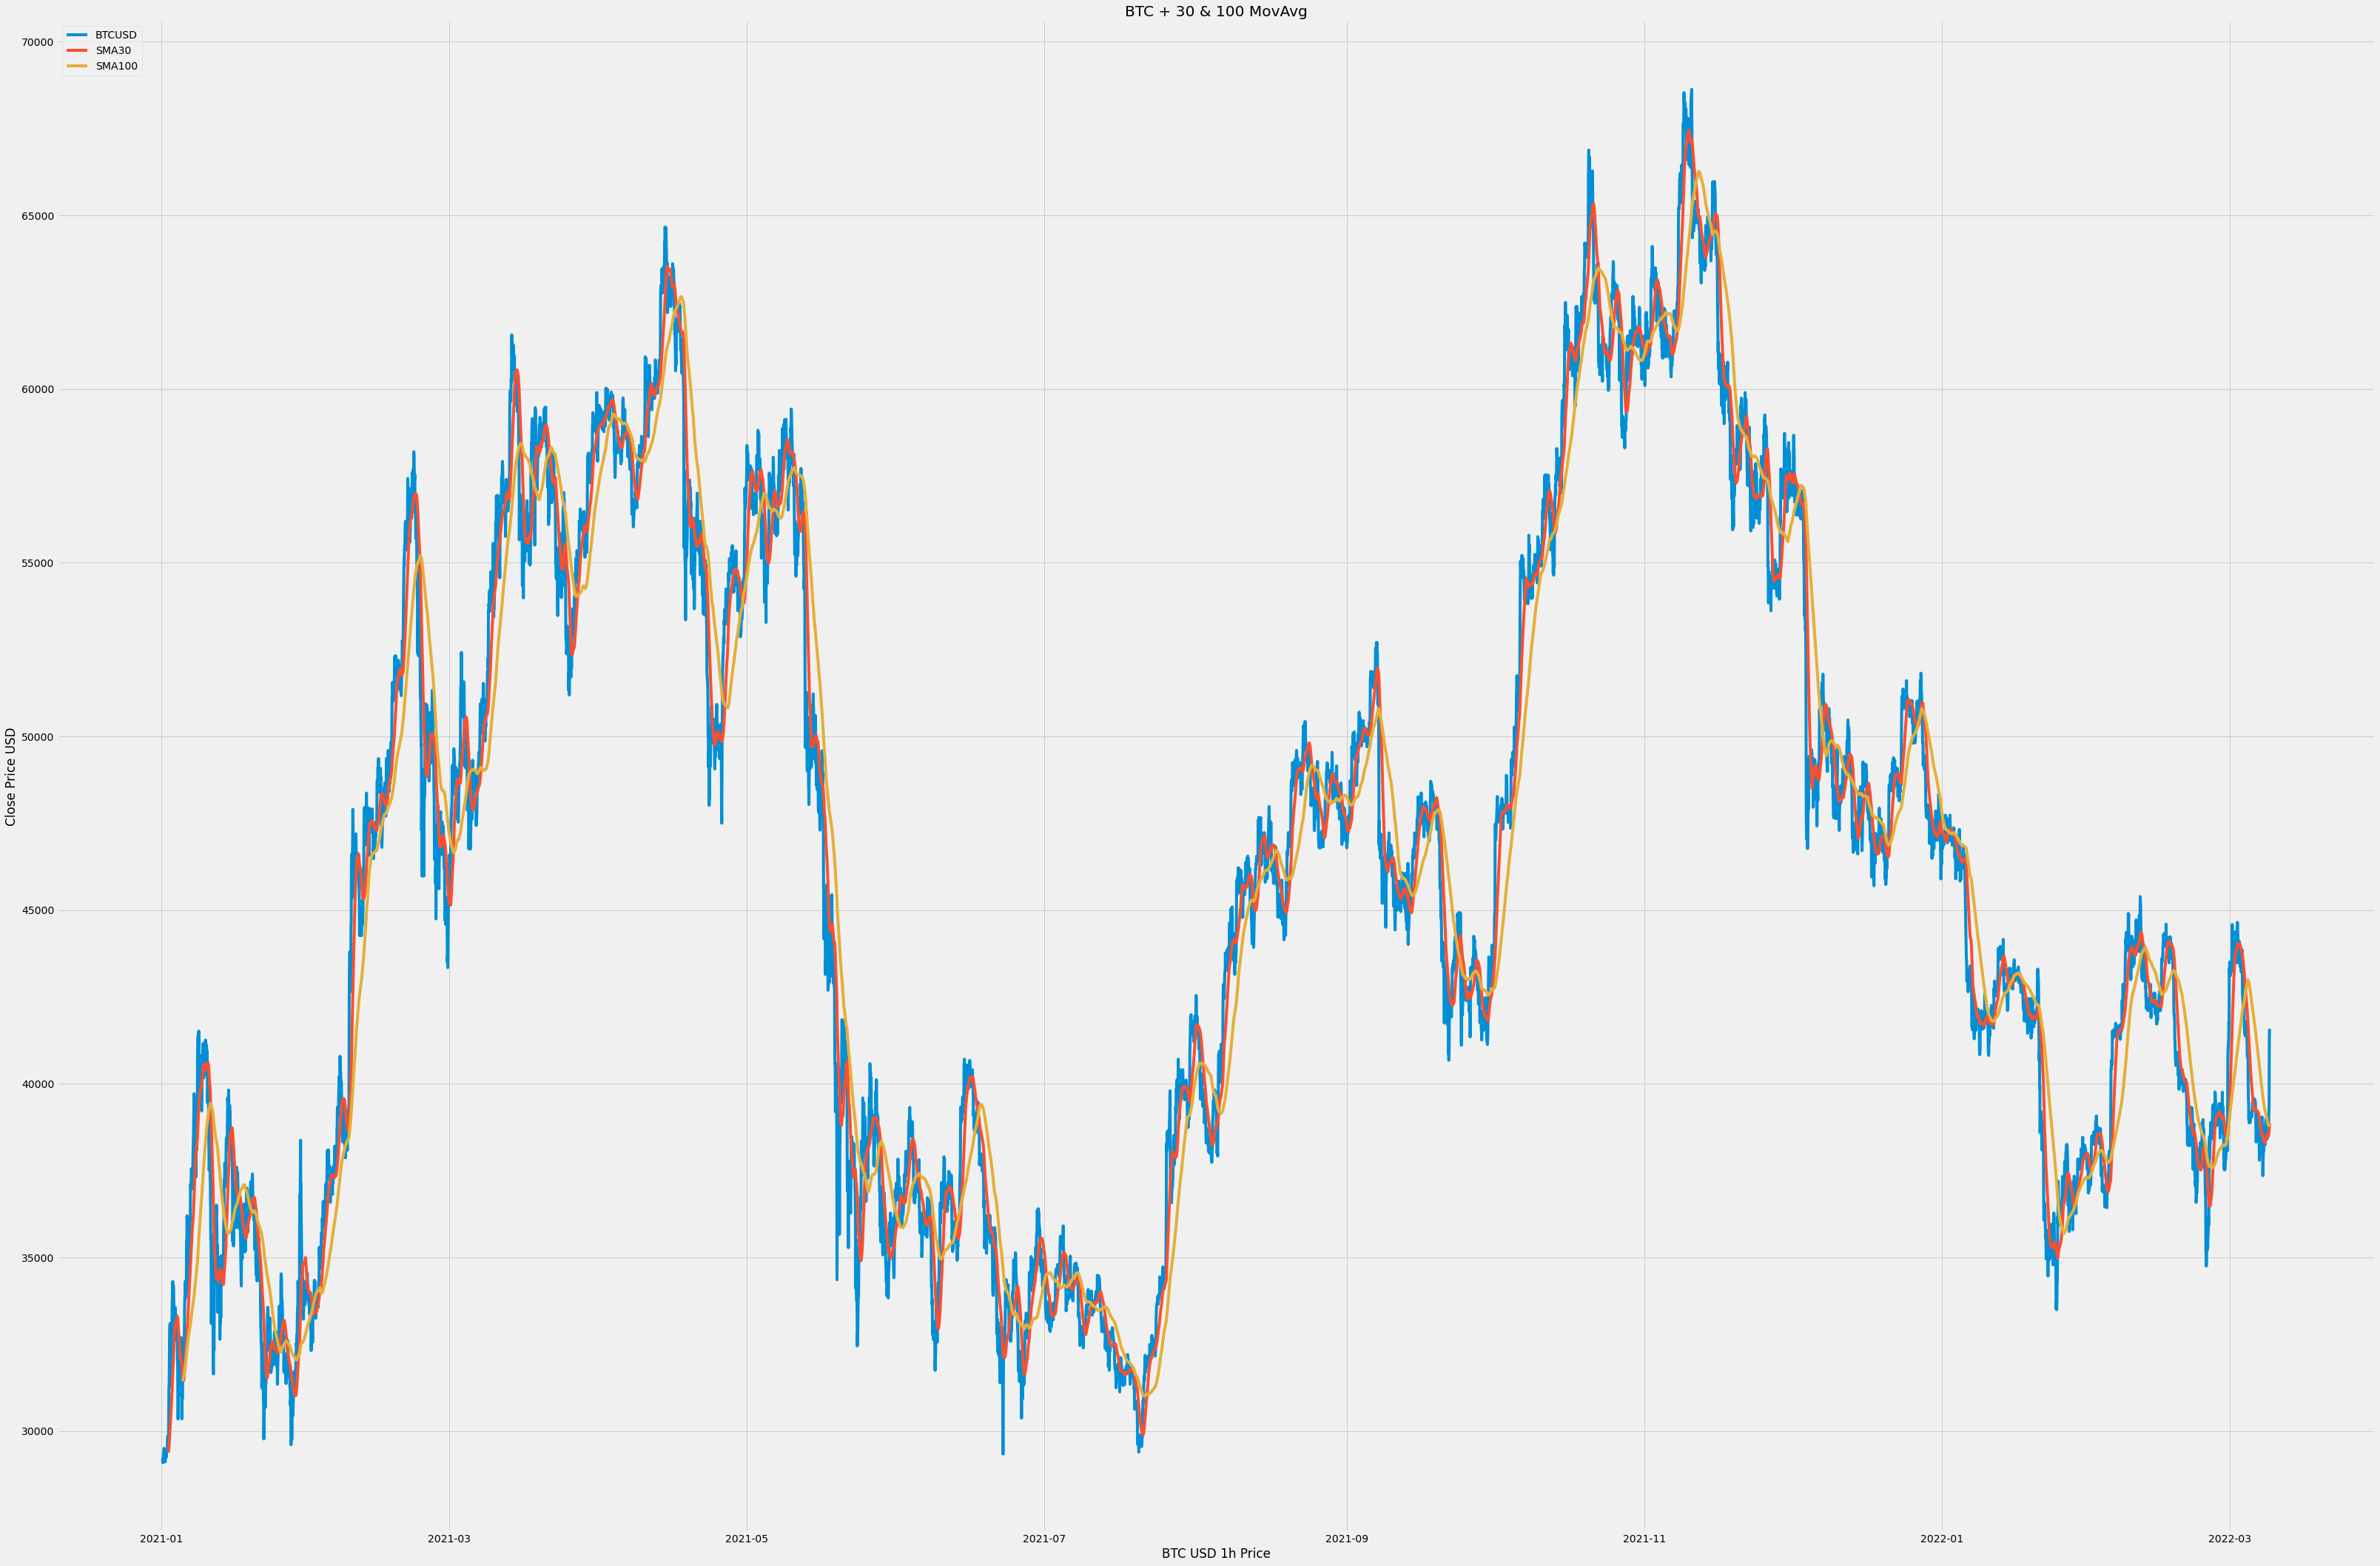

In [17]:
plt.figure(figsize = (50, 35))
plt.plot(btcusd['Close'], label = 'BTCUSD')
plt.plot(SMA30['Close'], label = 'SMA30')
plt.plot(SMA100['Close'], label = 'SMA100')
plt.title('BTC + 30 & 100 MovAvg')
plt.xlabel('BTC USD 1h Price')
plt.ylabel('Close Price USD')
plt.legend(loc = "upper left")
plt.show()

#Expand image, click top right, to see the cross overs

In [20]:
#Creating Dataframe of BTC USD with Simple Moving Averages 30 & 100
data = pd.DataFrame()
data['BTCUSD'] = btcusd['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.to_csv('BTC-SMA30-SMA100')

In [21]:
#Creating Dataframe of ETH USD with Simple Moving Averages 30 & 100
data = pd.DataFrame()
data['ETHUSD'] = ethusd['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.to_csv('ETH-SMA30-SMA100')

In [22]:
#Creating Dataframe of XMR USD with Simple Moving Averages 30 & 100
data = pd.DataFrame()
data['XMRUSD'] = xmrusd['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.to_csv('XMR-SMA30-SMA100')

In [23]:
#Creating Dataframe of LTC USD with Simple Moving Averages 30 & 100
data = pd.DataFrame()
data['LTCUSD'] = ltcusd['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.to_csv('LTC-SMA30-SMA100')

In [24]:
#Creating Dataframe of DCR USD with Simple Moving Averages 30 & 100
data = pd.DataFrame()
data['DCRUSD'] = dcrusd['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.to_csv('DCR-SMA30-SMA100')

In [ ]:
# def simplemov30(p):
#     pairs  = [btcusd, xmrusd, ethusd, dcrusd, ltcusd]
#     for p in pairs:
#         SMA30['Close'] = p['Close'].rolling(window = 30).mean()

# simplemov30(xmrusd)

TypeError: 'function' object does not support item assignment